# Fig_15 : tau, SF, as a function of rest-frame wavelength 

Moved from `code2/Compare_Celerite_Chelsea_real_fits.ipynb`. 


This version uses an updated version that takes part of sns.distributions code, and uses it to find the Kernel Density Estimate, and custom-written modules to find levels that enclose 68%, 95^, 99.7% of all data (to mark equivalents of 1,2,3-$\sigma$ levels) 

In [4]:
import modules as mod
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
import os
import pandas as pd 
from astropy.table import Table
from matplotlib import rcParams 
import seaborn as sns
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [5]:
baseDir = '../code2/'
# This is Chelsea ugriz data, x-matched with DBQSO and Shen2011...
s82ugriz = np.load(baseDir+'s82ugriz_shen2011_dbqso_dic.npy').item()

# using the most recent results 
# already xmatched with Shen2008, 2011, and Chelsea s82r 
date = '190807'
s82r = Table.read(baseDir+date+ "_Celerite_real_Jeff1_Shen2008-2011_s82drw_r.txt",
                 format='ascii')

# add a column with lambdaRF
lambdaobs = {'u':3520, 'g':4800, 'r':6250, 'i':7690, 'z' : 9110 }
s82r['lambdaRF'] = lambdaobs['r'] /  (1.+ s82r['redshift_1'])    

In [10]:
mod.cumsum_contour_levels??

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]
sdss red

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]
sdss-ps1 orange

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7]

Picking KDE pdf pixels that would include     t

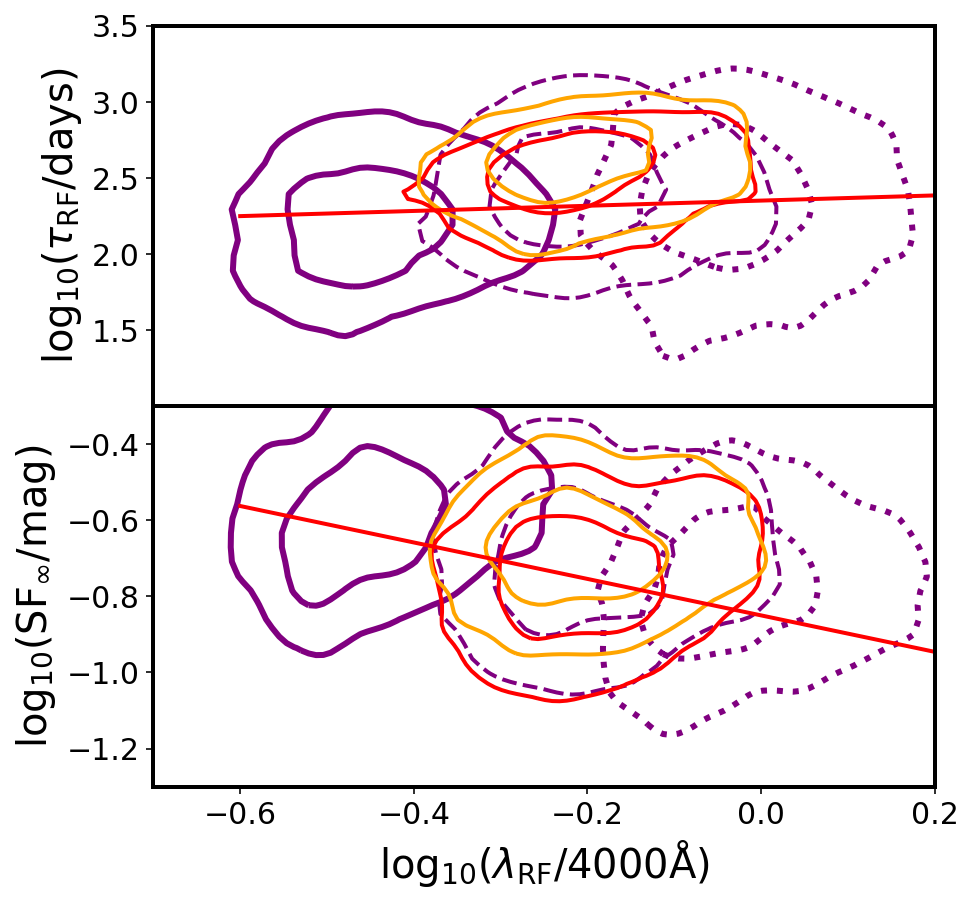

In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

ls = {'u':'-',  'g':':', 'r': '--', 'i': '-', 'z': ':' }
lw = {'u':3,    'g': 1,  'r':  2  , 'i': 1  , 'z': 3}
xlims = [-0.7,0.2]
ylims = {0: [1,3.5] , 1:[-1.3,-0.3]}
levels = [0.3, 0.7]

fig,ax = plt.subplots(2,1,figsize=(7,7))

seg = 'sdss-ps1' # -ptf

# plot the background of Chelsea's results 
for f in  'urz':# 'ugriz' : 
    x  = np.log10(s82ugriz[f]['lambdaRF'] / 4000 )
    i= 0 
    for ycol in ['tauRF', 'SFinf']:
        y = np.log10(s82ugriz[f][ycol])

        c = 'purple' 
        xx, yy, z = mod._statsmodels_bivariate_kde(x,y,'scott',100,3,None)
        outline = ax[i].contour(xx,yy,z , 
                                levels = mod.cumsum_contour_levels(z,levels), 
                                colors=c, linestyles=ls[f], linewidths=lw[f])
        i += 1
# plot Chelsea's fits 
x = np.linspace(-0.6, 0.2, 100)
ax[0].plot(x , 0.17 *  x + 2.35, c='red', lw=2 )
ax[1].plot(x, -0.479 * x - 0.85 , c='red', lw=2)
 
    
# Celerite : plot sdss and sdss-ps1 
segs = ['sdss', 'sdss-ps1']
for seg, c in zip(segs, ['red', 'orange']):
    print(seg,c)
    tau = s82r['tauEXP_'+seg]

    tauRF = tau / (1. + s82r['redshift_1'])
    SFinf = np.sqrt(2) * s82r['sigmaEXP_'+seg] 

    m2 = s82r['Plike'] - s82r['Pnoise'] > 2 
    m3 = s82r['Plike'] - s82r['Pinf'] > 0.05 
    m4 = s82r['edge'] == 0 
    m = m2&m3&m4  #m = tau > 3  

    x = np.log10(s82r['lambdaRF'][m] / 4000)
    i = 0 
    for ydata in [tauRF[m],SFinf[m]]:
        y = np.log10(ydata)
        
        xx, yy, z = mod._statsmodels_bivariate_kde(x,y,'scott',100,3,None)
        outline = ax[i].contour(xx,yy,z , 
                                levels = mod.cumsum_contour_levels(z,levels), 
                                colors=c, linestyles='-' ,linewidths=2)
        i += 1 


ax[1].set_xlabel(r'$\log_{10}{(\lambda_{\mathrm{RF}} / 4000 \mathrm{\AA})}$')
ax[0].set_ylabel(r'$\log_{10}{(\tau_{\mathrm{RF}} / \mathrm{days})}$')
ax[1].set_ylabel(r'$\log_{10}{(\mathrm{SF}_{\infty} / \mathrm{mag})}$')
ax[0].set_xlim(xlims)
ax[1].set_xlim(xlims)
ax[0].set_ylim(ylims[0])
ax[1].set_ylim(ylims[1])
# remove bottom tick from first axis 
ax[0].set_yticks(ax[0].get_yticks()[1:])

# remove bottom and top ticks  from second axis 
ax[1].set_yticks(ax[1].get_yticks()[1:-1])

# remove xticks from top axis 
ax[0].set_xticks([])


fig.subplots_adjust(hspace=0)
plt.savefig('Fig15_restframe_wavelength_tau_sigma_'+date+'.pdf', 
            bbox_inches='tight', dpi=100)
